## Limpieza

In [660]:
import pandas as pd

In [661]:
df = pd.read_csv("./presidentes.csv", delimiter=";")

In [662]:
def clean_ages(age):
    age = age[:2]
    return age

In [663]:
df["Edad al tomar posesión"] = df["Edad al tomar posesión"].apply(clean_ages)
df["Edad al dejar el cargo[4]\u200b"] = df["Edad al dejar el cargo[4]\u200b"].apply(clean_ages)
df["Edad al morir"] = df["Edad al morir"].apply(clean_ages)

In [664]:
df.rename(columns={
    "Edad al tomar posesión": "Age in",
    "Edad al dejar el cargo[4]\u200b": "Age out",
    "Edad al morir": "Age dead",
    "Gobernante": "President",
    "Fecha de nacimiento[1]\u200b": "Born Date",
    "Fecha de toma de posesión[2]\u200b": "In Date",
    "Fin del mandato[3]\u200b": "Out Date",
    "Fecha de muerte[5]\u200b": "Dead Date"
}, inplace=True)

In [665]:
def clean_dates(date):
    if "9999" in date:
        date = "-"
    # Intentar convertir la fecha al formato deseado
    try:
        return pd.to_datetime(date, format='%d/%m/%Y')
    except ValueError:
        # Si la conversión falla, devolver NaT o un valor vacío
        return pd.NaT

In [666]:
date_columns = ["In Date", "Out Date", "Dead Date", "Born Date"]

df[date_columns] = df[date_columns].map(clean_dates)

In [667]:
df = df.drop_duplicates(subset='President', keep='first')

# Modificar fecha de muerte de luis echeverria
df.loc[df["President"] == "Luis Echeverría", "Dead Date"] = pd.to_datetime("2022-07-08")

# Edad de muerte de luis echeverria
df.loc[df["President"] == "Luis Echeverría", "Age dead"] = 100

In [668]:
df.to_excel("presidents.xlsx")
df.to_csv("presidents.csv", index=False)

In [669]:
df

,President,Born Date,In Date,Age in,Out Date,Age out,Dead Date,Age dead,Periodo de postgobierno
0,Guadalupe Victoria,1786-09-29,1824-10-10,38,1829-03-31,42,1843-03-20,56,"13 años, 344 días"
1,Vicente Guerrero,1782-08-10,1829-04-01,46,1829-12-17,47,1831-02-14,48,"1 año, 59 días"
2,José María Bocanegra,1787-05-25,1829-12-17,42,1829-12-23,42,1862-07-23,75,"32 años, 213 días"
3,Anastasio Bustamante,1780-07-27,1830-01-01,49,1832-08-13,52,1853-02-06,72,"4 años, 247 díasPeriodo hasta que volvió a ocu..."
4,Melchor Múzquiz,1790-01-05,1832-08-13,42,1832-12-24,42,1844-12-14,54,"11 años, 355 días"
...,...,...,...,...,...,...,...,...,...
89,Vicente Fox,1942-07-02,2000-12-01,58,2006-11-30,64,NaT,0,"17 años, 9 meses y 3 días"
90,Felipe Calderón,1962-08-18,2006-12-01,44,2012-11-30,50,NaT,0,"11 años, 9 meses y 3 días"
91,Enrique Peña Nieto,1966-07-20,2012-12-01,46,2018-11-30,52,NaT,0,"5 años, 9 meses y 3 días"
92,Andrés Manuel López Obrador,1953-11-13,2018-12-01,65,2024-09-30,-,NaT,0,-


## Análisis Simple (Ingreso y Fallecimiento)

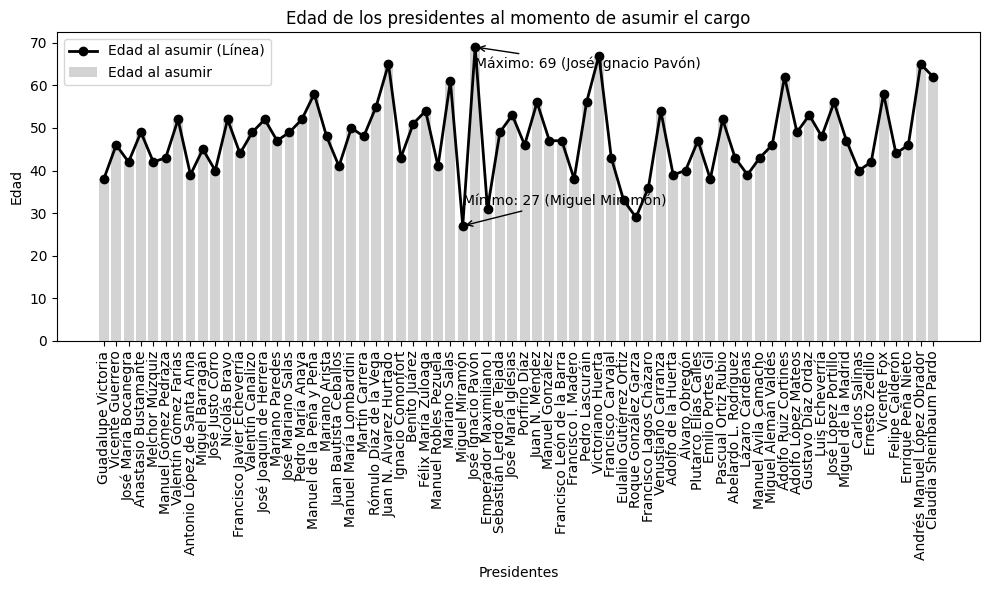

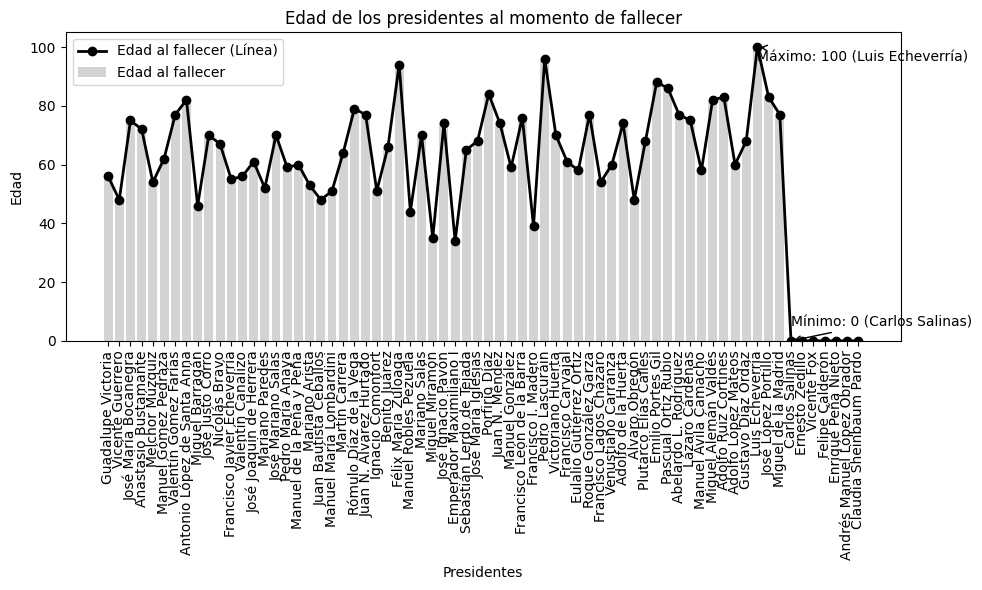

In [670]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './presidents.csv'
df = pd.read_csv(file_path)

# Limpiar datos no numéricos en columnas de edad
age_in_office_cleaned = pd.to_numeric(df['Age in'], errors='coerce')
age_at_death_cleaned = pd.to_numeric(df['Age dead'], errors='coerce')
presidents = df['President']

# Resetear las escalas de colores
plt.rcParams.update(plt.rcParamsDefault)

# Gráfico 1
plt.figure(figsize=(10, 6))
plt.bar(presidents, age_in_office_cleaned, color='lightgray', label='Edad al asumir')
plt.plot(presidents, age_in_office_cleaned, color='black', label='Edad al asumir (Línea)', linewidth=2, marker='o')
plt.title('Edad de los presidentes al momento de asumir el cargo')
plt.xlabel('Presidentes')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.legend()

# Agregar anotaciones
min_age_in = age_in_office_cleaned.min()
min_president_in = df.loc[age_in_office_cleaned.idxmin(), 'President']
max_age_in = age_in_office_cleaned.max()
max_president_in = df.loc[age_in_office_cleaned.idxmax(), 'President']

plt.annotate(f'Mínimo: {min_age_in} ({min_president_in})', 
             xy=(age_in_office_cleaned.idxmin(), min_age_in),
             xytext=(age_in_office_cleaned.idxmin(), min_age_in + 5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.annotate(f'Máximo: {max_age_in} ({max_president_in})',
             xy=(age_in_office_cleaned.idxmax(), max_age_in),
             xytext=(age_in_office_cleaned.idxmax(), max_age_in - 5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.tight_layout()
plt.show()

# Gráfico 2
plt.figure(figsize=(10, 6))
plt.bar(presidents, age_at_death_cleaned, color='lightgray', label='Edad al fallecer')
plt.plot(presidents, age_at_death_cleaned, color='black', label='Edad al fallecer (Línea)', linewidth=2, marker='o')
plt.title('Edad de los presidentes al momento de fallecer')
plt.xlabel('Presidentes')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.legend()

# Agregar anotaciones
max_age_death = age_at_death_cleaned.max()
max_president_death = df.loc[age_at_death_cleaned.idxmax(), 'President']
min_age_death = age_at_death_cleaned.min()
min_president_death = df.loc[age_at_death_cleaned.idxmin(), 'President']

plt.annotate(f'Máximo: {max_age_death} ({max_president_death})',
             xy=(age_at_death_cleaned.idxmax(), max_age_death),
             xytext=(age_at_death_cleaned.idxmax(), max_age_death - 5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.annotate(f'Mínimo: {min_age_death} ({min_president_death})',
             xy=(age_at_death_cleaned.idxmin(), min_age_death),
             xytext=(age_at_death_cleaned.idxmin(), min_age_death + 5),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.tight_layout()
plt.show()


## Análisis conjunto

### Expectativa de vida vs edad de comienzo

In [671]:
file_path = './life-expectancy.csv' 

le = pd.read_csv(file_path)

# Filtrar solo los datos de México
le_mx = le[le['Entity'] == 'Mexico']

In [672]:
le_mx

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
11854,Mexico,MEX,1893,23.2900
11855,Mexico,MEX,1894,26.6200
11856,Mexico,MEX,1895,29.5200
11857,Mexico,MEX,1896,28.8000
11858,Mexico,MEX,1897,26.2400
...,...,...,...,...
11968,Mexico,MEX,2017,74.1378
11969,Mexico,MEX,2018,74.0146
11970,Mexico,MEX,2019,74.2021
11971,Mexico,MEX,2020,70.1328


In [673]:
# Renombar columna de esperanza de vida
le_mx.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy'}, inplace=True)

/var/folders/0z/n4lvs5qd6yq9gmp5bkx4flyw0000gn/T/ipykernel_6919/2232433082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le_mx.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy'}, inplace=True)


In [674]:
pd.DataFrame(le_mx)

,Entity,Code,Year,Life Expectancy
11854,Mexico,MEX,1893,23.2900
11855,Mexico,MEX,1894,26.6200
11856,Mexico,MEX,1895,29.5200
11857,Mexico,MEX,1896,28.8000
11858,Mexico,MEX,1897,26.2400
...,...,...,...,...
11968,Mexico,MEX,2017,74.1378
11969,Mexico,MEX,2018,74.0146
11970,Mexico,MEX,2019,74.2021
11971,Mexico,MEX,2020,70.1328


In [675]:
# Agregar columna de life expectancy a df
# si el año de In Date es mayor o igual al añor de la columna Year de le_mx y no mas alla de 6 años, entonces se agrega la esperanza de vida
# In Date esta en el formato de %yyyy-%mm-%dd
# Year esta en el formato de %yyyy

df['In Date'] = pd.to_datetime(df['In Date'], format='%Y-%m-%d', errors='coerce')

def get_life_expectancy(row):
    year = row['In Date'].year
    le_row = le_mx[le_mx['Year'] == year]
    if le_row.empty:
        return None
    return le_row['Life Expectancy'].values[0]

df['Life Expectancy'] = df.apply(get_life_expectancy, axis=1)

df

,President,Born Date,In Date,Age in,Out Date,Age out,Dead Date,Age dead,Periodo de postgobierno,Life Expectancy
0,Guadalupe Victoria,1786-09-29,1824-10-10,38,1829-03-31,42,1843-03-20,56,"13 años, 344 días",NaN
1,Vicente Guerrero,1782-08-10,1829-04-01,46,1829-12-17,47,1831-02-14,48,"1 año, 59 días",NaN
2,José María Bocanegra,1787-05-25,1829-12-17,42,1829-12-23,42,1862-07-23,75,"32 años, 213 días",NaN
3,Anastasio Bustamante,1780-07-27,1830-01-01,49,1832-08-13,52,1853-02-06,72,"4 años, 247 díasPeriodo hasta que volvió a ocu...",NaN
4,Melchor Múzquiz,1790-01-05,1832-08-13,42,1832-12-24,42,1844-12-14,54,"11 años, 355 días",NaN
...,...,...,...,...,...,...,...,...,...,...
63,Vicente Fox,1942-07-02,2000-12-01,58,2006-11-30,64,NaN,0,"17 años, 9 meses y 3 días",73.5692
64,Felipe Calderón,1962-08-18,2006-12-01,44,2012-11-30,50,NaN,0,"11 años, 9 meses y 3 días",74.3313
65,Enrique Peña Nieto,1966-07-20,2012-12-01,46,2018-11-30,52,NaN,0,"5 años, 9 meses y 3 días",74.5740
66,Andrés Manuel López Obrador,1953-11-13,2018-12-01,65,2024-09-30,-,NaN,0,-,74.0146


In [676]:
# A partir de que In Date se tiene la esperanza de vida
df[df['Life Expectancy'].notnull()]

,President,Born Date,In Date,Age in,Out Date,Age out,Dead Date,Age dead,Periodo de postgobierno,Life Expectancy
46,Adolfo de la Huerta,1881-05-26,1920-06-01,39,1920-11-30,39,1955-07-09,74,"34 años, 221 días",34.0000
47,Álvaro Obregón,1880-02-19,1920-12-01,40,1924-11-30,44,1928-07-17,48,"3 años, 230 días",34.0000
48,Plutarco Elías Calles,1877-09-25,1924-12-01,47,1928-11-30,51,1945-10-19,68,"16 años, 323 días",32.8000
49,Emilio Portes Gil,1890-10-03,1928-12-01,38,1930-02-05,39,1978-12-10,88,"48 años, 308 días",34.5000
50,Pascual Ortiz Rubio,1877-03-10,1930-02-05,52,1932-09-02,55,1963-11-04,86,"31 años, 63 días",34.0000
51,Abelardo L. Rodríguez,1889-05-12,1932-09-02,43,1934-11-30,45,1967-02-13,77,"32 años, 75 días",38.4000
52,Lázaro Cárdenas,1895-05-21,1934-12-01,39,1940-11-30,45,1970-10-19,75,"29 años, 323 días",38.2000
53,Manuel Ávila Camacho,1897-04-24,1940-12-01,43,1946-11-30,49,1955-10-13,58,"8 años, 317 días",39.0000
54,Miguel Alemán Valdés,1900-09-29,1946-12-01,46,1952-11-30,52,1983-05-14,82,"30 años, 165",44.8000
55,Adolfo Ruiz Cortines,1889-12-30,1952-12-01,62,1958-11-30,68,1973-12-03,83,"15 años, 3 días",46.2020


In [677]:
# En que año está registrado porfirio diaz
df[df['President'] == 'Porfirio Díaz']

,President,Born Date,In Date,Age in,Out Date,Age out,Dead Date,Age dead,Periodo de postgobierno,Life Expectancy
34,Porfirio Díaz,1830-09-15,1876-11-27,46,1876-12-06,46,1915-07-02,84,73 díasPeriodo hasta que volvió a ocupar el cargo,NaN


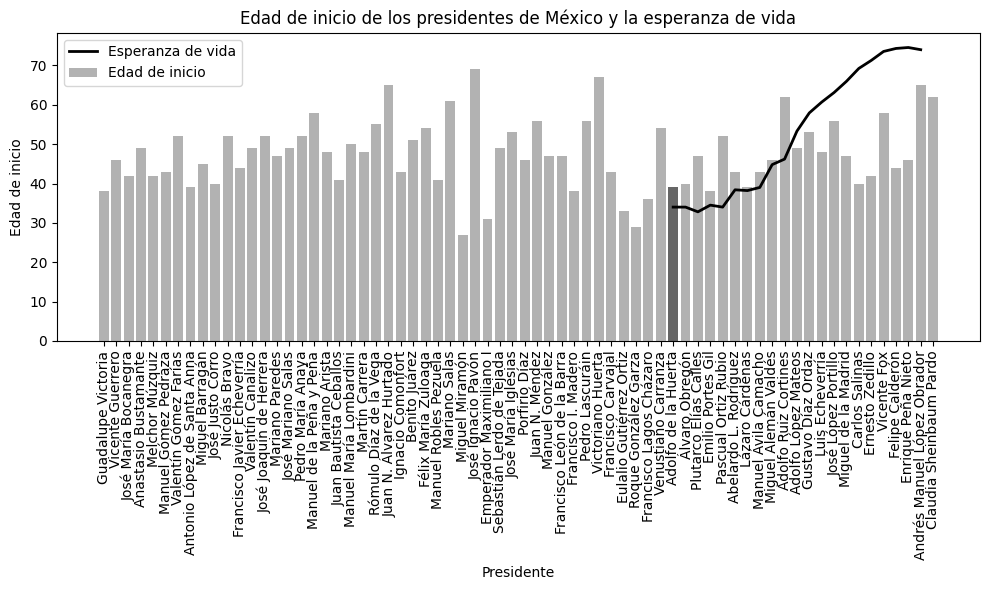

In [681]:
plt.figure(figsize=(10, 6))

colors = ['black' if pres == 'Adolfo de la Huerta' else 'gray' for pres in df['President']]
plt.bar(df['President'], df['Age in'], label="Edad de inicio", color=colors, alpha=0.6)

plt.plot(df['President'], df['Life Expectancy'], color='black', label="Esperanza de vida", linewidth=2)

plt.xticks(rotation=90)
plt.xlabel("Presidente")
plt.ylabel("Edad de inicio")
plt.title("Edad de inicio de los presidentes de México y la esperanza de vida")
plt.legend()
plt.tight_layout()

plt.show()


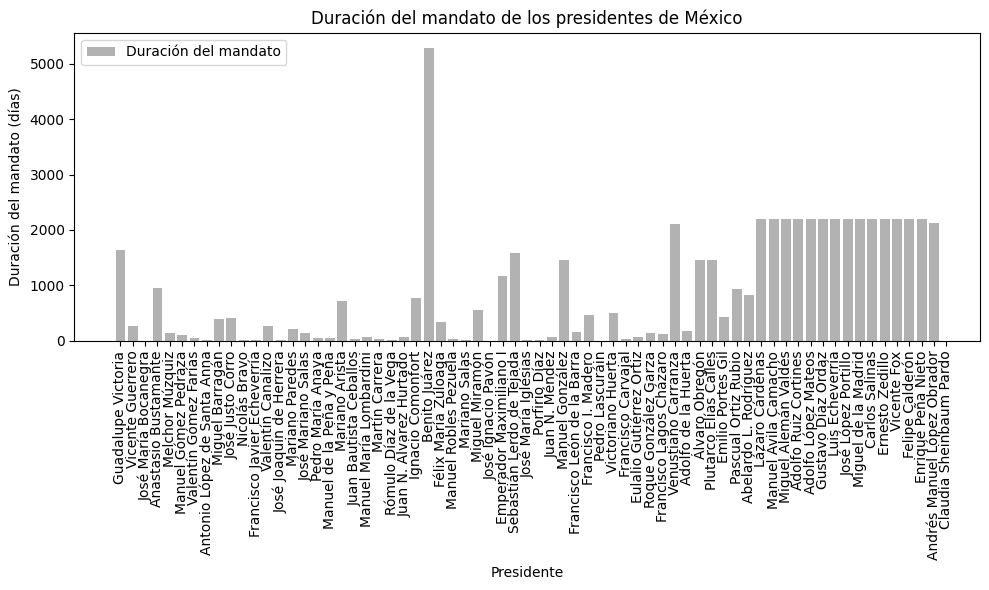

In [679]:
# Convertir las columnas 'In Date' y 'Out Date' a tipo datetime
df['In Date'] = pd.to_datetime(df['In Date'], format='%Y-%m-%d', errors='coerce')
df['Out Date'] = pd.to_datetime(df['Out Date'], format='%Y-%m-%d', errors='coerce')

# Resetear los parámetros de plt
plt.rcParams.update(plt.rcParamsDefault)

# Calcular la duración del mandato en días
df['Duration'] = (df['Out Date'] - df['In Date']).dt.days

# Graficar la duración del mandato y la esperanza de vida
plt.figure(figsize=(10, 6))

plt.bar(df['President'], df['Duration'], label="Duración del mandato", color='gray', alpha=0.6)

# Configurar etiquetas y título
plt.xticks(rotation=90)
plt.xlabel("Presidente")
plt.ylabel("Duración del mandato (días)")
plt.title("Duración del mandato de los presidentes de México")
plt.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()